
# [KDT] ch7 Unsupervised Learning

### Clustering / PCA / Association Rule 

 - 데이터셋: 직장인 연봉 정보 / 보스톤 집값 / 식료품 정보 데이터셋 
 - 주요 라이브러리: sklearn linear_model / sklearn.decomposition / mlxtend.preprocessing 
 - 알파 퀴즈(1개) / 파이 퀴즈(1개) / 시그마 퀴즈(2개) / 오메가 퀴즈(과제 1개) 

In [1]:
import os
os.getcwd()

'c:\\OneDrive\\문서\\Office\\DS 2022\\DS강의(onedrive)\\강의\\KDT\\2차_230227\\실습'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 원본 파일 로딩 
df_hk = pd.read_csv('.\\data\\hk_221206.csv')

## $\alpha$(알파) 퀴즈:

직장인 연봉 정보 데이터셋을 바탕으로 군집분석을 진행하고자 한다.
<br> 군집분석 진행 전 워밍업으로 지표간 거리 구하기 문제를 풀어 보고자 한다.

<br>p(x1, y1), q(x2, y2) 일때 上) 맨허튼 거리, 下) 유클리드 거리 수식은 아래와 같다

 $$d\left( p,q\right)   = |x_{1}-x_{2}| + |y_{1}-y_{2}| $$

$$d\left( p,q\right)   = \sqrt {  \left( x_{1}-x_{2}\right)^2 + \left( y_{1}-y_{2}\right)^2} $$

In [5]:
df_hk[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [6]:
#첫번째 데이터인 hkd1 의 정보값
df_hk.iloc[0, 8:10:]

salary         4100
expenditure    1975
Name: 0, dtype: object

In [7]:
#두번째 데이터인 hkd10 의 정보값
df_hk.iloc[1, 8:10:]

salary         4720
expenditure    2970
Name: 1, dtype: object

<b>quiz1)</b> 데이터셋의 첫번째 샘플과 두번째 샘플의 맨허튼거리를 구하라(변수는 salary, expenditure 2가지 활용) 

In [8]:
abs(df_hk.iloc[0,9] - df_hk.iloc[1,9])

995

In [9]:
abs(4100-4720) + abs(1975-2970)
abs(df_hk.iloc[0,8] - df_hk.iloc[1,8]) + abs(df_hk.iloc[0,9] - df_hk.iloc[1,9])

1615

<b>quiz2)</b> 데이터셋의 첫번째 샘플과 두번째 샘플의 유클리드 거리를 구하라(변수는 salary, expenditure 2가지 활용) 

In [10]:
((df_hk.iloc[0,8] - df_hk.iloc[1,8])**2 + (df_hk.iloc[0,9] - df_hk.iloc[1,9])**2)**0.5

1172.358733494147

## 1-0 Clustering 전처리

# 17:35분 까지

df_hk 데이터 셋 250개 샘플을 활용하여 군집을 만들어 세그먼트 분석을 하고자 한다. 
<br> 먼저 계층형 군집분석을 진행한다.  
<br> 군집분석시 활용할 변수는 <b>gender, age, company, grades, salary, expenditure</b> 이다.   
<br> 이때 수치형 변수 age, salary, expenditure는 정규화를 진행하고 정규화한 칼럼은 각각 age_st, salary_st, expenditure_st로 명명한다
<br> 명목형 변수 gender, company, grades는 더미변수화 한다.(drop_first 옵션 false, 순서는 표기된 대로 진행할 것) 
<br> 전체 데이터셋 순서는 표준화한 age, salary, expenditure와 나머지 gender, company, grades 더미변수다.  

<br>
<br> 위 전처리를 마친 후 데이터셋 이름은 <b>basetable1</b>로 명명한다

In [11]:
df_hk.shape

(250, 10)

In [12]:
# df 생성 gender, age, company, grades, salary, expenditure
df_hk_1= df_hk[['gender', "age", "company", "grades", "salary", "expenditure" ]]
df_hk_1[:2]

,gender,age,company,grades,salary,expenditure
0,F,22,A,A,4100,1975
1,F,31,A,B,4720,2970


In [13]:
# StandardScaling ['age', 'salary', 'expenditure']
from sklearn.preprocessing import StandardScaler

st = StandardScaler().fit( df_hk_1[['age', 'salary', 'expenditure']])
st_table = pd.DataFrame(st.transform(df_hk_1[['age', 'salary', 'expenditure']]), columns=['age_st', 'salary_st', 'expenditure_st'])
st_table[:5]

,age_st,salary_st,expenditure_st
0,-1.996162,-1.222845,-1.613278
1,-0.954082,-0.887000,-1.077579
2,1.824798,0.499716,0.502599
3,-1.301442,-1.244513,-1.096422
4,-1.185655,-1.065756,-0.514960


In [14]:
# get_dummies ['gender', 'company', 'grades']
df_dummy = pd.get_dummies( df_hk_1[['gender', 'company', 'grades']])

In [15]:
# basetable1
basetable1 = pd.concat( [df_hk_1, st_table, df_dummy], axis=1)
basetable1[:5]

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0
3,F,28,B,B,4060,2935,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0
4,M,29,B,F,4390,4015,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1


In [16]:
basetable1.describe().round(3)

,age,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
count,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000
mean,39.240,6357.480,4971.480,-0.000,0.000,0.000,0.448,0.552,0.400,0.400,0.200,0.316,0.464,0.128,0.064,0.028
std,8.654,1849.791,1861.113,1.002,1.002,1.002,0.498,0.498,0.491,0.491,0.401,0.466,0.500,0.335,0.245,0.165
min,20.000,3080.000,1330.000,-2.228,-1.775,-1.961,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,33.000,5002.500,3593.750,-0.723,-0.734,-0.742,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,39.000,6100.000,4762.500,-0.028,-0.139,-0.113,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,46.000,7427.500,6272.500,0.783,0.580,0.700,1.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000
max,55.000,11990.000,10865.000,1.825,3.051,3.173,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## 1-1. Clustering - Hierarchical Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수를 바탕으로 Hierarchical 군집분석을 시행한다
<br>(sklearn AgglomerativeClustering 진행) 

In [18]:
# 대상 df 생성, age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수
basetable_cluster_1 = basetable1.iloc[ : , 6:]
basetable_cluster_1[:5]

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0
2,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0
3,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0
4,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1


In [19]:
# AgglomerativeClustering

cluster_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(basetable_cluster_1)

In [20]:
# Attribute
cluster_1

AgglomerativeClustering(n_clusters=3)

In [21]:
# cluster_1.labels_
cluster_1.labels_

array([2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### 계층형 군집분석 시각화: dendrogram(60개 샘플 대상)  

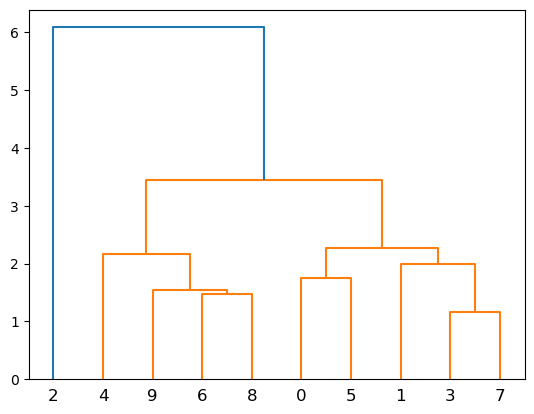

[[ 3.          7.          1.16776141  2.        ]
 [ 6.          8.          1.4744076   2.        ]
 [ 9.         11.          1.54646993  3.        ]
 [ 0.          5.          1.74687666  2.        ]
 [ 1.         10.          1.99897105  3.        ]
 [ 4.         12.          2.16286058  4.        ]
 [13.         14.          2.27794512  5.        ]
 [15.         16.          3.45189526  9.        ]
 [ 2.         17.          6.08959283 10.        ]]


In [22]:
# dendrogram 그리기 (10개)

from scipy.cluster.hierarchy import dendrogram, linkage

link_10 = linkage(basetable_cluster_1.iloc[:10, : ], 'ward')
dendrogram(link_10) 
plt.show()
print(link_10) # link : cluster링 결과, 처음 두 개는 행 번호, 거리, 클러스터에 속한 데이터 수

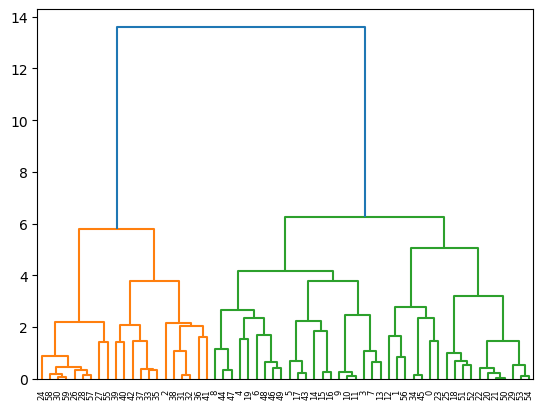

[[21. 50.  0.  2.]
 [30. 59.  0.  2.]
 [10. 11.  0.  2.]
 [53. 54.  0.  2.]
 [28. 57.  0.  2.]]


In [23]:
# dendrogram 그리기 (60개)

from scipy.cluster.hierarchy import dendrogram, linkage

link_60 = linkage(basetable_cluster_1.iloc[:60, : ], 'ward')
dendrogram(link_60) 
plt.show()
print(link_60.round(0)[:5]) # link : cluster링 결과, 처음 두 개는 행 번호, 거리, 클러스터에 속한 데이터 수

In [24]:
# 예측, 새로운 정보값으로 예측할때 사용
# basetable1['cluster_hier'] 

basetable1['cluster_hier'] = cluster_1.fit_predict( basetable_cluster_1) # 지금은 cluster_1.labels_와 같은 값, 아래 확인
                                                                         # (cluster_1.labels_ == basetable1['cluster_hier']).sum()
basetable1

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,cluster_hier
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0,2
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0,1
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0,0
3,F,28,B,B,4060,2935,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0,2
4,M,29,B,F,4390,4015,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,F,50,A,A,6990,4865,1.245864,0.342627,-0.057328,1,0,1,0,0,1,0,0,0,0,0
246,F,51,A,A,7110,4985,1.361651,0.407630,0.007279,1,0,1,0,0,1,0,0,0,0,0
247,M,52,A,B,8000,6625,1.477438,0.889730,0.890240,0,1,1,0,0,0,1,0,0,0,0
248,M,53,A,B,8760,7385,1.593224,1.301411,1.299417,0,1,1,0,0,0,1,0,0,0,0


In [25]:
# 타겟값 맵핑 {0:'a', 1:'b', 2:'c'}

basetable1['cluster_hier'] = basetable1['cluster_hier'].map({0:'a', 1:'b', 2: 'c'})
basetable1[:5]

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,cluster_hier
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0,c
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0,b
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0,a
3,F,28,B,B,4060,2935,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0,c
4,M,29,B,F,4390,4015,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1,c


In [26]:
pd.crosstab(basetable1['company'], basetable1['cluster_hier'])

cluster_hier,a,b,c
company,,,
A,42,35,23
B,7,53,40
C,31,0,19


### cluster / company에 따른 scatter plot 

Text(0.5, 1.0, 'category : hierarchy cluster')

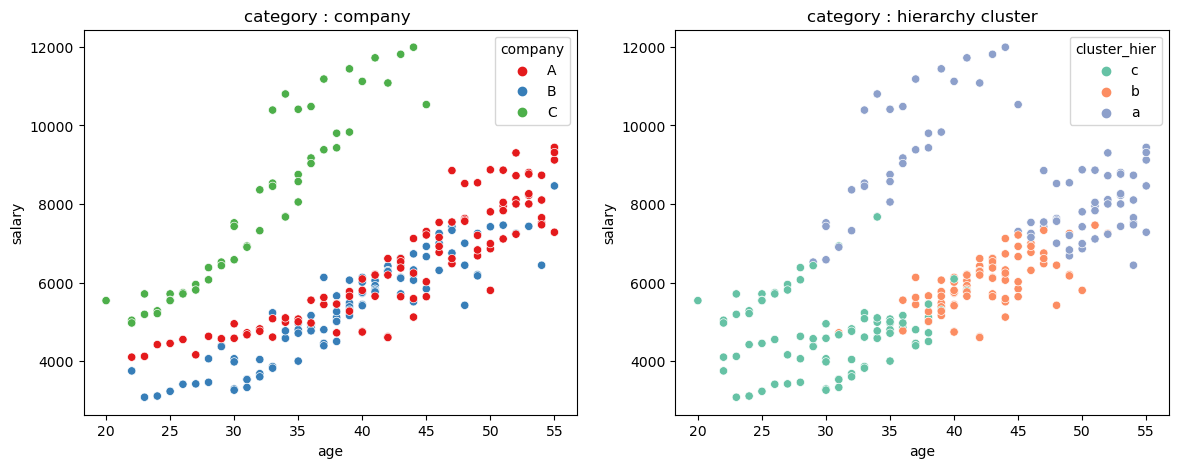

In [27]:
# 회사별 분류 

fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))
sns.scatterplot(x='age', y='salary', data=basetable1, hue='company',  palette='Set1', ax= ax[0] )
sns.scatterplot(x='age', y='salary', data=basetable1, hue='cluster_hier',  palette='Set2', ax=ax[1] )

ax[0].set_title('category : company ')
ax[1].set_title('category : hierarchy cluster')

hierarchy cluster는 군집 A: 고 연령 / 고 연봉 , 군집 B: 중상 연령, 중저 연봉, 군집 C: 저 연령 / 저 연봉 으로 분류

In [28]:
basetable1.groupby(['cluster_hier'])[['age', 'salary', 'expenditure']].mean()

,age,salary,expenditure
cluster_hier,,,
a,45.112500,8479.375000,7107.500000
b,42.147727,5948.409091,4610.340909
c,30.390244,4726.341463,3275.121951


In [29]:
basetable1.groupby(['cluster_hier'])[['age', 'salary', 'expenditure']].describe()

age                                                       \
             count       mean       std   min    25%   50%    75%   max   
cluster_hier                                                              
a             80.0  45.112500  8.173736  29.0  37.00  48.0  52.00  55.0   
b             88.0  42.147727  3.893820  31.0  39.75  42.0  44.25  52.0   
c             82.0  30.390244  5.122586  20.0  26.00  30.5  34.00  41.0   

             salary               ...                  expenditure  \
              count         mean  ...     75%      max       count   
cluster_hier                      ...                                
a              80.0  8479.375000  ...  9202.5  11990.0        80.0   
b              88.0  5948.409091  ...  6382.5   7460.0        88.0   
c              82.0  4726.341463  ...  5205.0   7670.0        82.0   

                                                                          \
                     mean          std     min      25%     50%      75%   
cluster_hier                                                               
a             7107.500000  1299.693976  4865.0  6271.25  6800.0  7508.75   
b             4610.340909   791.327560  2970.0  4042.50  4742.5  5171.25   
c             3275.121951   875.562597  1330.0  2697.50  3212.5  3878.75   

                       
                  max  
cluster_hier           
a             10865.0  
b              6500.0  
c              5630.0  

[3 rows x 24 columns]

## 1-2. Clustering - K means

age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수를 바탕으로 K-means 군집분석을 시행한다
<br> (sklearn KMeans 진행, n_cluster = 3, random_state=123)

In [30]:
# basetable_cluster_1 (df, age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수)
basetable_cluster_1[:2]

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0


In [31]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

<b><kmeans split 에러시 threadpoolctl 업그레이드 필요> </b>
<br>!pip install threadpoolctl --user --upgrade
<br>import threadpoolctl
<br>threadpoolctl.__version__ <- 3.0 이상 필요 

In [32]:
# K-means 모델 n_clusters=3, random_state=123
# cluster_1_2 = 

cluster_1_2  = KMeans(n_clusters = 3, random_state=123).fit(basetable_cluster_1)
cluster_1_2

KMeans(n_clusters=3, random_state=123)

In [33]:
# Attribute 확인
cluster_1_2.inertia_

638.8469482817075

In [34]:
#k - means 라벨값 
# basetable1['cluster_kmean'] = 
cluster_1_2.labels_

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
basetable1['cluster_kmean'] = cluster_1_2.labels_
basetable1[:2]

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,...,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,cluster_hier,cluster_kmean
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,...,1,0,0,1,0,0,0,0,c,0
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,...,1,0,0,0,1,0,0,0,b,0


In [36]:
# crosstab 'cluster_hier' 'cluster_kmean'
pd.crosstab( basetable1['cluster_hier'], basetable1['cluster_kmean'])

cluster_kmean,0,1,2
cluster_hier,,,
a,3,28,49
b,38,0,50
c,81,1,0


In [37]:
# crosstab 'company' 'cluster_kmean'

pd.crosstab( basetable1['company'], basetable1['cluster_kmean'])

cluster_kmean,0,1,2
company,,,
A,36,0,64
B,65,0,35
C,21,29,0


In [38]:
pd.crosstab( basetable1['company'], basetable1['cluster_hier'])

cluster_hier,a,b,c
company,,,
A,42,35,23
B,7,53,40
C,31,0,19


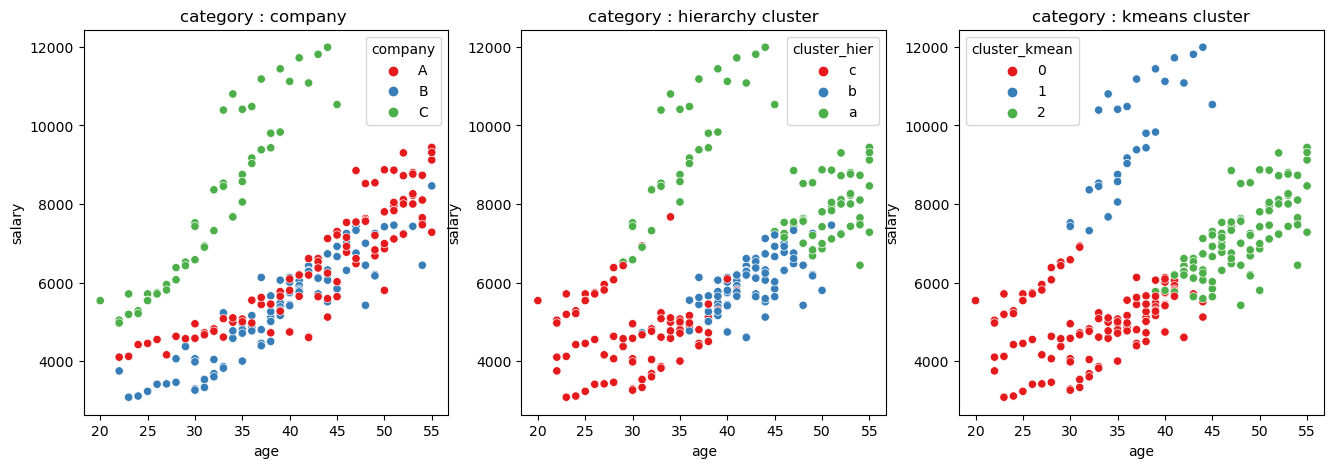

In [39]:
# 회사별 분류 

fig, ax = plt.subplots( nrows= 1 , ncols=3, figsize=(16, 5))
sns.scatterplot(x='age', y='salary', data=basetable1, hue='company',        palette='Set1', ax=ax[0] )
sns.scatterplot(x='age', y='salary', data=basetable1, hue='cluster_hier',   palette='Set1', ax=ax[1] )
sns.scatterplot(x='age', y='salary', data=basetable1, hue='cluster_kmean',  palette='Set1', ax=ax[2] )

ax[0].set_title('category : company ')
ax[1].set_title('category : hierarchy cluster')
ax[2].set_title('category : kmeans cluster')
plt.show()

# 10:10분에 시작하겠습니다.

## 1-4. Clustering 평가 - Elbow score
- kmeans inertia_ 활용

Inertia 값, 군집화후 각 중심점에서 군집의 데이타간 거리를 합산한것으로 응집도를 나타내는 값 

값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있음

In [40]:
# n_clusters=k를 1부터 10까지 적용

inertias = []
mapping = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=123).fit(basetable_cluster_1) 
    inertias.append(kmeanModel.inertia_)
    mapping[k] = kmeanModel.inertia_
    print('k값 ', k , '=>', kmeanModel.inertia_)

k값  1 => 1199.5439999999999
k값  2 => 775.9317969906917
k값  3 => 638.8469482817075
k값  4 => 550.6283433805727
k값  5 => 496.67747402500856
k값  6 => 448.5505418540803
k값  7 => 413.20808502428827
k값  8 => 385.49643467255527
k값  9 => 360.38142798560244


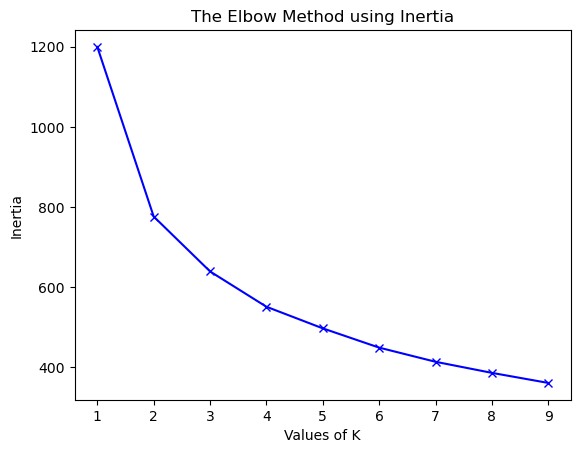

In [41]:
# Elbow score 시각화
plt.plot(np.arange(1, 10), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## 1-5. Clustering 평가 - Silhouette Test

silhouette score는 1에 가까워야 positive

In [42]:
from sklearn.metrics import silhouette_score, mean_squared_error, classification_report

In [43]:
k_score = pd.DataFrame(columns =['k', 'score'])
for i in np.arange(2, 7):
    model_clustering = KMeans( n_clusters=i, random_state=123).fit(basetable_cluster_1)
    a = silhouette_score( basetable_cluster_1,model_clustering.labels_)
    k = pd.DataFrame({'k':[i], 'score':[a]})
    k_score = pd.concat([k_score, k]).reset_index(drop=True)
    print("K값 ", i, " silhouette score: ", a.round(3) )

K값  2  silhouette score:  0.292
K값  3  silhouette score:  0.278
K값  4  silhouette score:  0.218
K값  5  silhouette score:  0.224
K값  6  silhouette score:  0.236


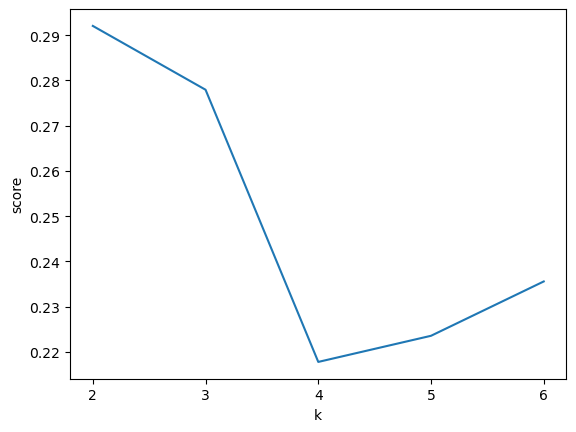

In [44]:
sns.lineplot(x='k', y='score', data=k_score)
plt.xticks([2, 3, 4, 5, 6])
plt.show()

### K 값에 따른 scatter plot

In [45]:
# K값 2~5까지 cluster_model, cluster_label 생성
cluster_model_k1 = KMeans( n_clusters=2, random_state=123).fit(basetable_cluster_1)
cluster_model_k2 = KMeans( n_clusters=3, random_state=123).fit(basetable_cluster_1)
cluster_model_k3 = KMeans( n_clusters=4, random_state=123).fit(basetable_cluster_1)
cluster_model_k4 = KMeans( n_clusters=5, random_state=123).fit(basetable_cluster_1)

cluster_plot = basetable1.copy()
cluster_plot['cluster_k1'] = cluster_model_k1.labels_
cluster_plot['cluster_k2'] = cluster_model_k2.labels_
cluster_plot['cluster_k3'] = cluster_model_k3.labels_
cluster_plot['cluster_k4'] = cluster_model_k4.labels_

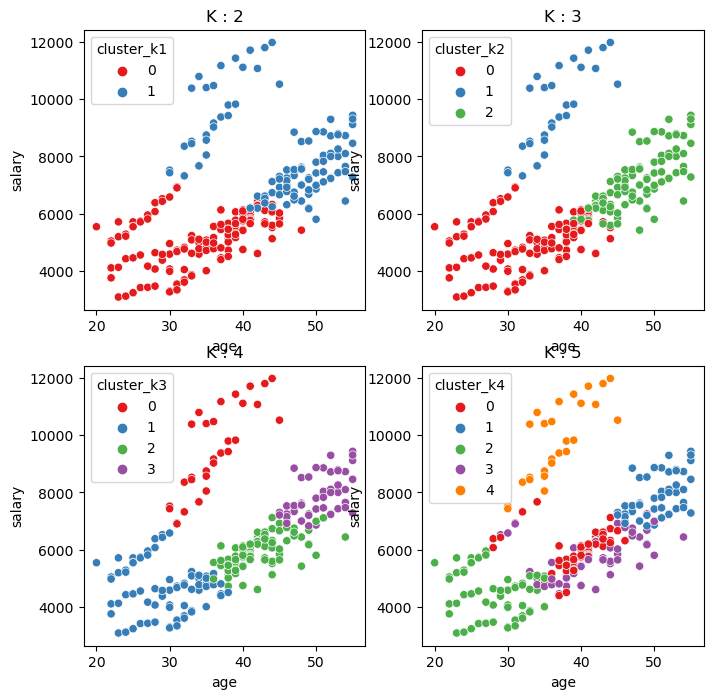

In [46]:
# K별 Plot 

fig, ax = plt.subplots( nrows= 2 , ncols=2, figsize=(8, 8))
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k1',  palette='Set1', ax= ax[0][0] )
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k2',  palette='Set1', ax=ax[0][1] )
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k3',  palette='Set1', ax=ax[1][0] )
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k4',  palette='Set1', ax=ax[1][1] )


ax[0][0].set_title('K : 2')
ax[0][1].set_title('K : 3')
ax[1][0].set_title('K : 4')
ax[1][1].set_title('K : 5')
plt.show()

## 1-6. Clustering 예측

250개 데이터 셋을 바탕으로 군집분석을 실시 하였다.
<br> 250개 외 추가 데이터 셋 샘플을 추가 할 경우, 모델을 바탕으로 기존 군집분석을 바탕으로 Cluster를 분류 할 수 있다. 
<br> 모델은 Kmeans 알고리즘을 통해 3개 cluster로 분류한 cluster_1_2 모델을 활용한다.

<br> 데이터셋 샘플 - 성별:남성 / age:33 / company :C / grades: B / salary : 4500 / expenditure: 2975

<br> <b>작업순서</b>
<br> 1.수치형 변수 표준화 -> 2. 더미변수 확인 -> 3. 데이터 프레임에 맞춰 데이터 셋 준비 -> 4.Cluster 예측 

In [47]:
# basetable1
basetable1.head(3)

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,...,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,cluster_hier,cluster_kmean
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,...,1,0,0,1,0,0,0,0,c,0
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,...,1,0,0,0,1,0,0,0,b,0
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,...,1,0,0,0,1,0,0,0,a,2


In [48]:
basetable_cluster_1.head(3)

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0
2,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0


In [49]:
#sample_1 나이:33, 연봉:4500, 소비액:2975
#sample_1 = 
sample_1 = pd.DataFrame({'age':[33], 'salary':[4500], 'expenditure':[2975]})
sample_1

,age,salary,expenditure
0,33,4500,2975


In [50]:
#기존 표준화 모델 활용
st.transform(sample_1)

array([[-0.72250877, -1.00617084, -1.07488664]])

In [51]:
#sample_1 DataFrame 변경
#sample_1_num = 
sample_1_num = pd.DataFrame( st.transform(sample_1), columns = ['age_st', 'salary_st', 'expenditure_st'])
sample_1_num

,age_st,salary_st,expenditure_st
0,-0.722509,-1.006171,-1.074887


In [52]:
#dummy DataFrame 생성
#sample_1_dummy =
sample_1_dummy = pd.DataFrame( [[0,0,0,0,0,0,0,0,0,0]], columns = df_dummy.columns)
sample_1_dummy

,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,0,0,0,0,0,0,0,0,0,0


In [53]:
#dummy변수 정보값 생성, 'gender_M', 'company_C', 'grades_B'
sample_1_dummy['gender_M'] = 1
sample_1_dummy['company_C'] = 1
sample_1_dummy['grades_B'] = 1

In [54]:
sample_1_dummy

,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,0,1,0,0,1,0,1,0,0,0


In [55]:
# 최종 DataFrame 만들기, sample_1_num,  sample_1_dummy concat
# predic_sample1 = 
predic_sample1 = pd.concat([ sample_1_num, sample_1_dummy], axis=1)
predic_sample1 

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-0.722509,-1.006171,-1.074887,0,1,0,0,1,0,1,0,0,0


In [56]:
# predic_sample1로 cluster 예측
cluster_1_2.predict( predic_sample1)
print("cluster 번호는 : ", cluster_1_2.predict( predic_sample1)[0])

cluster 번호는 :  0


## Quiz) 추가 예측 

<br> cluster 예측모델로 아래 데이터의 결과를 예측하시오 
<br> 성별:여성 / age:43 / company :B / grades: B / salary : 7900 / expenditure: 6000

In [57]:
# 기존 DataFrame을 사용하여 sample DataFrame 만들기 : to_dict() 활용
basetable_cluster_1[:1].to_dict()

#z표준화
st.transform([[  43, 7900, 6000]]) 

# 추가 정보값 입력


array([[0.43535785, 0.83556143, 0.5537458 ]])

In [58]:
basetable_cluster_1[:1].to_dict()

{'age_st': {0: -1.9961620439438865},
 'salary_st': {0: -1.2228452194331043},
 'expenditure_st': {0: -1.6132775345800814},
 'gender_F': {0: 1},
 'gender_M': {0: 0},
 'company_A': {0: 1},
 'company_B': {0: 0},
 'company_C': {0: 0},
 'grades_A': {0: 1},
 'grades_B': {0: 0},
 'grades_C': {0: 0},
 'grades_D': {0: 0},
 'grades_F': {0: 0}}

In [59]:
predic_sample2 = pd.DataFrame({'age_st': {0: 0.43535785},
 'salary_st': {0: 0.83556143},
 'expenditure_st': {0: 0.5537458},
 'gender_F': {0: 0},
 'gender_M': {0: 0},
 'company_A': {0: 0},
 'company_B': {0: 1},
 'company_C': {0: 0},
 'grades_A': {0: 0},
 'grades_B': {0: 1},
 'grades_C': {0: 0},
 'grades_D': {0: 0},
 'grades_F': {0: 0}})

predic_sample2

cluster_1_2.predict( predic_sample2)
print("cluster 번호는 : ", cluster_1_2.predict( predic_sample2)[0])

cluster 번호는 :  2


In [60]:
# 기존방법
sample_2 = pd.DataFrame({'age':[43], 'salary':[7900], 'expenditure':[6000]})
sample_2_num = pd.DataFrame( st.transform(sample_2), columns = ['age_st', 'salary_st', 'expenditure_st'])
sample_2_dummy = pd.DataFrame( [[0, 0,0,0,0,0,0,0,0,0]], columns = df_dummy.columns)
sample_2_dummy['gender_F'][0] = 1
sample_2_dummy['company_B'][0] = 1
sample_2_dummy['grades_B'][0] = 1
predic_sample2 = pd.concat([ sample_2_num, sample_2_dummy], axis=1)

predic_sample2

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,0.435358,0.835561,0.553746,1,0,0,1,0,0,1,0,0,0


In [61]:
# predic_sample2로 cluster 예측
cluster_1_2.predict( predic_sample2)
print("cluster 번호는 : ", cluster_1_2.predict( predic_sample2)[0])

cluster 번호는 :  2


## 2. $\pi$(파이) 퀴즈 : 붓꽃 데이터 셋 활용 Kmeans / Hierachy 

sklearn 라이브러리 활용을 통한 붓꽃 품종 분류 
<br>
<br> 워밍업: x축을 'sepal_length'으로 y축을 'petal_length'로 scatter plot을 도식화 하시오. 
<br> 이때 라이브러리는 seaborn을 활용하고 'species' 그룹에 따라 색깔을 다르게 표현하시오.

In [62]:
# 파일 로딩 
df_iris = pd.read_csv('.\\data\\iris.csv')

In [63]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [64]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


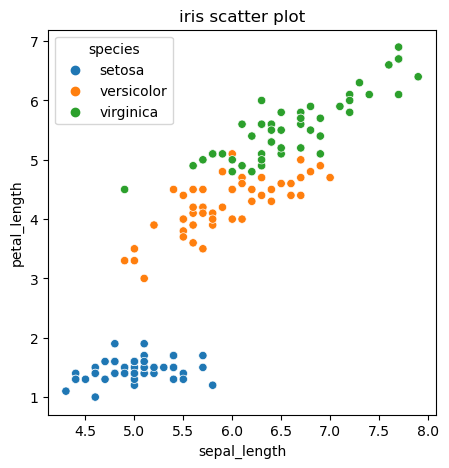

In [65]:
# iris scatter plot, x='sepal_length',  y='petal_length'

fig  = plt.figure( figsize=(5, 5))
sns.scatterplot( data =df_iris, x='sepal_length',  y='petal_length', hue='species')

plt.title('iris scatter plot')
plt.show()

<br> 계층형 군집분석을 통해 3개의 군집으로 분류하고자 한다. 
<br> 수치형 4개 변수 모두 활용해 minmax 정규화를 1차로 수행한 후 
<br> sklearn의 AgglomerativeClustering 메소드를 활용, 하이퍼 파라미터값은 하단을 참조하여 군집분석을 수행하라
<br> (n_clusters=3, affinity='manhattan', linkage='average')
<br>
<br><b> 문제: 3개 클러스터별 'sepal_length' 평균을 확인하고 평균값이 가장 높은 클러스터의 'sepal_length' 평균을 구하라</b>

# 10:54분 까지

In [66]:
# MinMaxScaling
from sklearn.preprocessing import MinMaxScaler

In [67]:
# AgglomerativeClustering, (n_clusters=3, affinity='manhattan', linkage='average')
iris_scaler = MinMaxScaler()
iris_scaler.fit_transform(df_iris.drop('species', axis=1))
df_iris_sc = pd.DataFrame( iris_scaler.fit_transform(df_iris.drop('species', axis=1)), columns = df_iris.columns[:-1])
df_iris_sc[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [68]:
# AgglomerativeClustering, (n_clusters=3, affinity='manhattan', linkage='average')
model_2 = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average').fit(df_iris_sc)

In [69]:
df_iris['cluster'] = model_2.labels_
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,0


In [70]:
# pd.crosstab
pd.crosstab(model_2.labels_,df_iris['species'] )

species,setosa,versicolor,virginica
row_0,,,
0,0,0,29
1,50,0,0
2,0,50,21


In [71]:
df_iris.groupby('cluster')['sepal_length'].mean().nlargest()

cluster
0    6.965517
2    5.974648
1    5.006000
Name: sepal_length, dtype: float64

# 11:14분에 시작하겠습니다.

<AxesSubplot:xlabel='cluster', ylabel='sepal_width'>

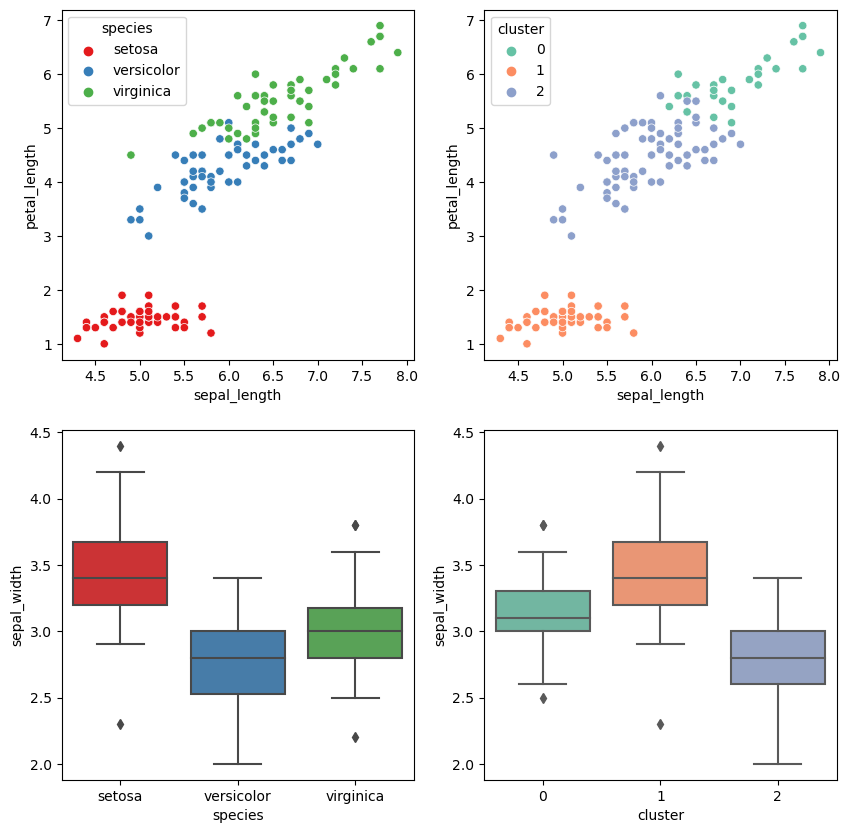

In [72]:
# 시각화
fig, ax = plt.subplots( nrows= 2 , ncols=2,  figsize=(10,10))

sns.scatterplot( data = df_iris, x='sepal_length',  y='petal_length', hue='species' , palette='Set1', ax= ax[0][0])
sns.scatterplot( data = df_iris,  x='sepal_length',  y='petal_length', hue='cluster', palette='Set2',ax= ax[0][1])
sns.boxplot( data = df_iris, x='species', y='sepal_width' , palette='Set1', ax= ax[1][0])
sns.boxplot( data = df_iris, x='cluster', y='sepal_width' , palette='Set2', ax= ax[1][1])

#### (추가) 집단간 sepal_length 평균 차이가 통계적으로 유의미하게 차이 나는지 확인해 보기 

<br> species가 versicolor 인 데이터셋과 이와 유사한 클러스터와 sepal_length 평균 차이 확인해 본다.
<br> shapiro 메소드를 통해 정규성을 확인하고 scipy의 ttest_ind 메소드를 활용할 것 

In [73]:
from scipy.stats import shapiro, ttest_ind

# p-vaue 0.05 이상이면 정규성 만족 
a = df_iris.loc[ df_iris['species']=='versicolor', 'sepal_length']
b = df_iris.loc[ df_iris['cluster']==2, 'sepal_length']

# shapiro Test, p-vaue 0.05 이상이면 정규성 만족 

print( shapiro(a))
print( shapiro(b)) 

# 두 집단의 평균의 차이, ttest_ind

print( 'ttest_ind Result: ', ttest_ind( a, b))

print( 'a.mean(): ', a.mean())
print( 'b.mean(): ', b.mean())

ShapiroResult(statistic=0.9778357148170471, pvalue=0.4647378921508789)
ShapiroResult(statistic=0.9824140667915344, pvalue=0.4217180013656616)
ttest_ind Result:  Ttest_indResult(statistic=-0.4215216515103207, pvalue=0.6741346439118632)
a.mean():  5.936
b.mean():  5.974647887323944


## 3. PCA 

<br> 주성분 분석(Principal Component Analysis, PCA) 가장 널리 사용되는 차원 축소 기법 중 하나
<br> iris 데이터 활용 

In [74]:
#  df 생성
df_iris_2 = df_iris.iloc[:, :4]
df_iris_2[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

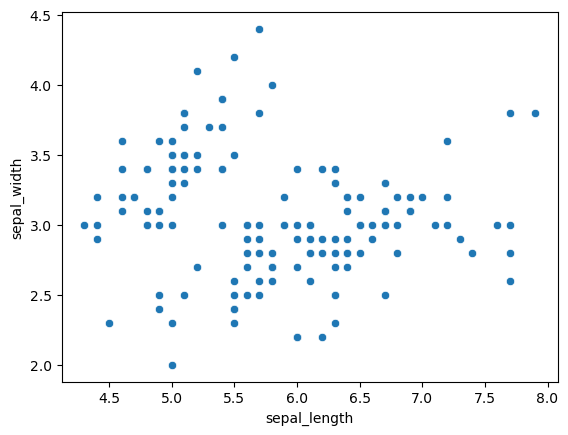

In [75]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data=df_iris_2)

In [76]:
#정규화
iris_std = StandardScaler().fit_transform(df_iris_2)
df_iris_std = pd.DataFrame(iris_std, columns =  df_iris_2.columns)
df_iris_std.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal_length,-0.900681,-1.143017,-1.385353,-1.506521,-1.021849,-0.537178,-1.506521,-1.021849,-1.748856,-1.143017,...,1.038005,1.280340,-0.052506,1.159173,1.038005,1.038005,0.553333,0.795669,0.432165,0.068662
sepal_width,1.019004,-0.131979,0.328414,0.098217,1.249201,1.939791,0.788808,0.788808,-0.362176,0.098217,...,0.098217,0.098217,-0.822570,0.328414,0.558611,-0.131979,-1.282963,-0.131979,0.788808,-0.131979
petal_length,-1.340227,-1.340227,-1.397064,-1.283389,-1.340227,-1.169714,-1.340227,-1.283389,-1.340227,-1.283389,...,1.046945,0.762758,0.762758,1.217458,1.103783,0.819596,0.705921,0.819596,0.933271,0.762758
petal_width,-1.315444,-1.315444,-1.315444,-1.315444,-1.315444,-1.052180,-1.183812,-1.315444,-1.315444,-1.447076,...,1.580464,1.448832,0.922303,1.448832,1.712096,1.448832,0.922303,1.053935,1.448832,0.790671


In [77]:
#공분산행렬 확인 
import numpy as np 
cov_matrix = np.cov(df_iris_std.T)

In [78]:
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [79]:
##고유값(분산설명력, explained_variance), 고유벡터 추출(사영계수, components)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [80]:
#고유값(분산설명력, explained_variance)
eigenvalues

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [81]:
#고유벡터 추출(사영계수, components)
eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [82]:
pca_iris = pd.DataFrame({'pca1':df_iris_std @ eigenvectors.T[0], 'pca2':df_iris_std @ eigenvectors.T[1], 
                         'pca3':df_iris_std @ eigenvectors.T[2], 'pca4':df_iris_std @ eigenvectors.T[3]})

In [83]:
pca_iris

,pca1,pca2,pca3,pca4
0,-2.264703,-0.480027,-0.127706,0.024168
1,-2.080961,0.674134,-0.234609,0.103007
2,-2.364229,0.341908,0.044201,0.028377
3,-2.299384,0.597395,0.091290,-0.065956
4,-2.389842,-0.646835,0.015738,-0.035923
...,...,...,...,...
145,1.870503,-0.386966,0.256274,0.389257
146,1.564580,0.896687,-0.026371,0.220192
147,1.521170,-0.269069,0.180178,0.119171
148,1.372788,-1.011254,0.933395,0.026129


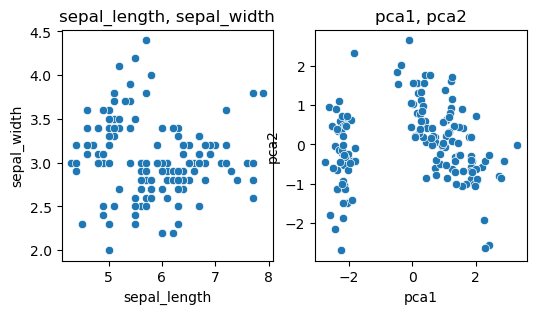

In [84]:
# 시각화 비교 
fig, ax = plt.subplots( nrows= 1 , ncols=2,  figsize=(6,3))

sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data=df_iris_2,   ax= ax[0])
sns.scatterplot(x = 'pca1', y = 'pca2',                data=pca_iris,    ax= ax[1])

ax[0].set_title('sepal_length, sepal_width')
ax[1].set_title('pca1, pca2')

plt.show()

In [85]:
#PCA 라이브러리 
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

pc = PCA().fit(df_iris_std)

In [86]:
# Attiribute 확인
pc.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [87]:
#고유값(분산설명력, explained_variance), eigenvalues 비교
pc.explained_variance_, eigenvalues

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]))

In [88]:
#고유벡터 확인(사영계수, components)
pc.components_, eigenvectors

(array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
        [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
        [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
        [-0.26128628,  0.12350962,  0.80144925, -0.52359713]]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [89]:
#pca1
df_iris_std @ pc.components_[0]

0     -2.264703
1     -2.080961
2     -2.364229
3     -2.299384
4     -2.389842
         ...   
145    1.870503
146    1.564580
147    1.521170
148    1.372788
149    0.960656
Length: 150, dtype: float64

In [90]:
# eigenvectors로 계산한것과 비교
pca_iris[:5]

,pca1,pca2,pca3,pca4
0,-2.264703,-0.480027,-0.127706,0.024168
1,-2.080961,0.674134,-0.234609,0.103007
2,-2.364229,0.341908,0.044201,0.028377
3,-2.299384,0.597395,0.091290,-0.065956
4,-2.389842,-0.646835,0.015738,-0.035923


In [91]:
# transform으로 PCA 계산, df_iris_std @ pc.components_[0]
pd.DataFrame(pc.transform(df_iris_std), columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

,PCA1,PCA2,PCA3,PCA4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [92]:
# 누적 분산 설명력(explained_variance_ratio_)
pc.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

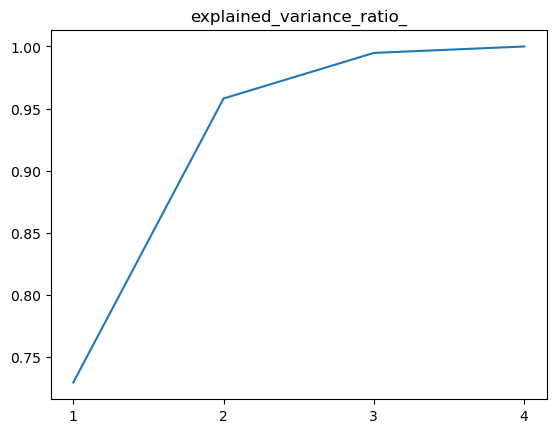

In [93]:
# 누적 분산 설명력(explained_variance_ratio_) 시각화
sns.lineplot(x = [1,2,3,4], y=pc.explained_variance_ratio_.cumsum())
plt.xticks([1,2,3,4])
plt.title('explained_variance_ratio_')
plt.show()

### 콘크리트 데이터 셋 활용, PCA 통해 만든 합성변수로 종속변수 strength을 예측하는 다중 회귀 분석 모델 설계
<br>1030 rows × 9 columns
<br> 라이브러리 : from sklearn.decomposition import PCA

In [94]:
# brick_concrete.csv 파일 로딩
df_brick = pd.read_csv('.\\data\\yellowbrick_concrete.csv')

In [95]:
df_brick

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [96]:
df_brick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cement    1030 non-null   float64
 1   slag      1030 non-null   float64
 2   ash       1030 non-null   float64
 3   water     1030 non-null   float64
 4   splast    1030 non-null   float64
 5   coarse    1030 non-null   float64
 6   fine      1030 non-null   float64
 7   age       1030 non-null   int64  
 8   strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [97]:
 df_brick.corr()

,cement,slag,ash,water,splast,coarse,fine,age,strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
splast,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarse,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


각 변수별 상관계수 매트릭스 플롯 시각화 

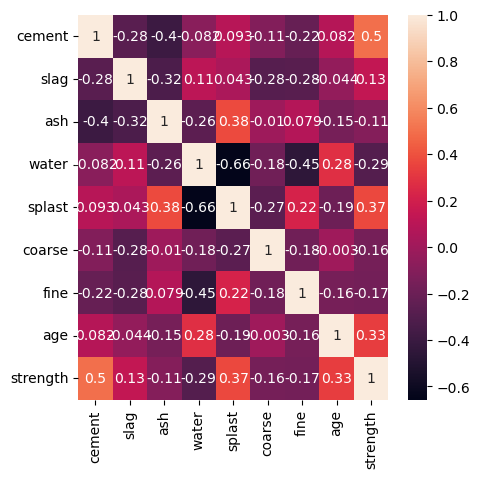

In [98]:
# heatmap
fig = plt.figure( figsize=(5,5))

sns.heatmap( df_brick.corr(), annot=True)
plt.show()

In [99]:
#다중 공선성 VIF 로 feature 특성 파악
# case1

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = df_brick.columns
vif['VIF'] = [variance_inflation_factor(df_brick.values, i) for i in range(df_brick.shape[1])]
vif.sort_values('VIF', ascending = False)

,features,VIF
3,water,92.512523
5,coarse,85.900013
6,fine,73.522864
0,cement,26.248178
8,strength,14.555916
4,splast,5.520316
2,ash,4.561734
1,slag,4.444466
7,age,2.434882


VIF 지수가 10 초과하는 변수들이 다수 존재 
<br> PCA를 통해 차원 축소, 복잡성을 줄이자!

PCA 프로세스
<br>1.정규화 -> 2. 공분산 행렬 계산 -> 3. 공분산 행렬 고유벡터와 고유값 계산 -> 4. 주성분 구하기

### 1.정규화

In [100]:
# 정규화
sc3 = StandardScaler()
df_brick_sc = pd.DataFrame( sc3.fit_transform( df_brick.drop('strength', axis=1)), columns =  df_brick.drop('strength', axis=1).columns )
df_brick_sc

,cement,slag,ash,water,splast,coarse,fine,age
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733


### 2. 공분산 행렬 계산 / 3. 공분산 행렬 고유벡터와 고유값 계산
sklearn.decomposition 라이브러리를 통해 자동 추출

In [101]:
from sklearn.decomposition import PCA

In [102]:
#고유값  
# pd.Series( pca_model.explained_variance_ )
pca_model = PCA(random_state=123).fit(df_brick_sc)
pca_model

PCA(random_state=123)

In [103]:
#고유값 (분산설명력)
pca_model.explained_variance_ratio_.cumsum()

array([0.28498605, 0.46201247, 0.62954284, 0.75631214, 0.87526237,
       0.97402864, 0.99624471, 1.        ])

In [104]:
#고유벡터 (사영계수)
pca_model.components_

array([[ 0.09827295,  0.17725317, -0.39464178,  0.54705427, -0.50591697,
         0.03805569, -0.40190575,  0.29152151],
       [-0.11181022,  0.68562442, -0.14379962,  0.0529213 ,  0.28360405,
        -0.63034067, -0.01956876, -0.12567848],
       [ 0.81449534, -0.17340093, -0.40777505, -0.21308433,  0.23419128,
        -0.17256392, -0.00484576,  0.10097873],
       [-0.05437612, -0.36269994,  0.22654071,  0.29601729, -0.03741495,
        -0.5457468 ,  0.38554226,  0.5278852 ],
       [ 0.14788131, -0.02121136,  0.5499439 ,  0.07046483,  0.35441099,
        -0.03310011, -0.7011056 ,  0.22809163],
       [-0.20312941,  0.30495397, -0.18309239, -0.36612798,  0.19324298,
         0.31451971,  0.09236092,  0.74389043],
       [ 0.22208449,  0.22837173,  0.35236521, -0.52417861, -0.66463655,
        -0.22701428, -0.03908382,  0.06925024],
       [ 0.44612725,  0.43735666,  0.38191098,  0.38874361,  0.05176469,
         0.34935768,  0.43337671,  0.01289534]])

### 4. 주성분 구하기

In [105]:
# transform
pca_model.transform(df_brick_sc)
df_brick_tr = pd.DataFrame( pca_model.transform(df_brick_sc) , columns = df_brick_sc.columns)
df_brick_tr.columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8']
df_brick_tr

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8
0,0.678942,-1.452251,2.391055,-1.352192,0.395663,-0.442858,0.781108,-0.211041
1,0.686287,-1.573914,2.357748,-1.457527,0.389274,-0.382152,0.737292,-0.143611
2,4.155677,0.361971,0.361423,1.474634,1.773968,1.571166,-0.004281,-0.073755
3,4.594304,0.172874,0.513357,2.268896,2.117157,2.690432,0.099914,-0.054353
4,2.363531,-0.276274,-0.276059,2.627950,-0.251961,3.928288,0.418614,0.126414
...,...,...,...,...,...,...,...,...
1025,-0.525081,1.252282,-0.026251,0.458085,0.473144,-0.454480,0.331921,-0.097990
1026,-0.835049,0.748411,0.411132,1.813304,0.554869,-1.418195,-0.177755,-0.018695
1027,-0.184979,1.249837,-1.478085,0.589970,0.208831,-0.386986,0.141915,-0.038484
1028,-0.283681,1.272749,-0.639916,-0.908585,-0.588532,0.935760,-0.755728,-0.183004


### 합성변수의 수는 행 수: 데이터셋 수 / 칼럼 수 : 데이터셋 칼럼 수
데이터셋 칼럼 수 만큼의 합성 변수가 만들어 진다.
<br>(ex: 10개의 칼럼이 있으면 PCA 후 합성변수 수는 총 10개) 

In [106]:
#합성변수 transform + pca1~8 columns 생성 (1030 rows X 8 columns)


PCA 설명력 확인 6개 합성 변수를 통해 90% 이상 설명 가능 하다 

In [107]:
pca_model.explained_variance_ratio_

array([0.28498605, 0.17702642, 0.16753038, 0.1267693 , 0.11895022,
       0.09876628, 0.02221607, 0.00375529])

In [108]:
pca_model.explained_variance_ratio_.cumsum()

array([0.28498605, 0.46201247, 0.62954284, 0.75631214, 0.87526237,
       0.97402864, 0.99624471, 1.        ])

## PCA 절차 정리
1) df

2) sc = StandardScaler().fit_transform(df)

3) PCA().fit(sc) => explained_variance_ , explained_variance_ratio_

4) PCA().fit_transform(sc)

In [109]:
# 1) df (  df_brick_sc_1  )
# 2) sc = StandardScaler().fit_transform(df)
sc = StandardScaler().fit_transform( df_brick.drop('strength', axis=1))
pd.DataFrame(sc)

,0,1,2,3,4,5,6,7
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733


In [110]:
# 3) PCA().fit(sc) => explained_variance_ , explained_variance_ratio_
model_pca = PCA(random_state=123).fit(sc)
model_pca.explained_variance_

array([2.28210403, 1.41758764, 1.3415455 , 1.01513995, 0.95252658,
       0.79089808, 0.17790128, 0.03007148])

In [111]:
# 4) PCA().fit_transform(sc)
tran_pca = PCA(random_state=123).fit_transform(sc)
df_brick_pca = pd.DataFrame(tran_pca)

## 3. $\pi$(파이) 퀴즈 : 아래 회귀분석을 시행하고 평가결과를 비교하시오

 - case 1) 종속변수: df_brick['strength'], 독립변수: df_brick_sc 변수 8개 로 회귀분석
 - case 2) 종속변수: df_brick['strength'], 독립변수: df_brick_sc PCA합성변수 6개 로 회귀분석
 - case 1)과 case 2)의 RMSE를 비교하라

In [112]:
df_brick_sc[:2]

,cement,slag,ash,water,splast,coarse,fine,age
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.86316,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.05617,-1.217658,-0.279733


In [113]:
df_brick_pca[:2]

,0,1,2,3,4,5,6,7
0,0.678942,-1.452251,2.391055,-1.352192,0.395663,-0.442858,0.781108,-0.211041
1,0.686287,-1.573914,2.357748,-1.457527,0.389274,-0.382152,0.737292,-0.143611


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pred_8  = LinearRegression().fit(X= df_brick_sc, y=df_brick['strength']).predict(df_brick_sc)
pred_6  = LinearRegression().fit(X= df_brick_pca.iloc[:, :6], y=df_brick['strength']).predict(df_brick_pca.iloc[:, :6])

print("모델 1 RMSE : ",  mean_squared_error(pred_8, df_brick['strength'])**0.5)
print("모델 2 RMSE : ",  mean_squared_error(pred_6, df_brick['strength'])**0.5)

모델 1 RMSE :  10.35431324301635
모델 2 RMSE :  11.011188213538754


# 14:10분에 시작하겠습니다.

## 4. Asociation rules

250명의 식료품 구매 이력을 바탕으로 연관성 분석 수행
<br> (file: hkdataset_associaterules.csv - 식료품 데이터셋)
<br> (file: hk_221206.csv - hk_table, 회사원 데이터 셋)

<br> A회사 임직원을 대상으로 연관성 규칙 확인 
<br> 우유를 단일 선행으로 하는 규칙을 만들며 후행 품목 수는 상관없다.    
<br> 이를 위해 A회사 100명의 식료품 구매 이력을 확인하여 A회사 임직원 대상으로 장바구니 분석을 수행한다.
<br> 이때 우유를 선행으로 하는 규칙 중 Lift 값이 가장 높은 item은 무엇인지 확인하시오.
<br> HINT: 식료품 데이터셋과 회사원 데이터셋을 join하여 사용. 
<br> 
<br><b> 관련 라이브러리 및 하이퍼 파라미터 값 </b>
<br> from mlxtend.preprocessing import TransactionEncoder
<br> from mlxtend.frequent_patterns import apriori, association_rules
<br> 조건 min_support=0.1, min_confidence=0.01

Asociation rules 를 위해 mlxtend install 필요

!pip install mlxtend

In [115]:
# !pip install mlxtend

In [116]:
# 파일 로딩
df_asso = pd.read_csv('.\\data\\hkdataset_associaterules.csv')

In [117]:
df_asso #250명의 식료품 구매 내역 데이터

,id,item
0,hkd1,chocolate
1,hkd1,Corn
2,hkd1,Sugar
3,hkd1,Dill
4,hkd1,Yogurt
...,...,...
1528,hkd250,Butter
1529,hkd250,Milk
1530,hkd250,chocolate
1531,hkd250,Cheese


In [118]:
# 파일 로딩 
df_hk= pd.read_csv('.\\data\\hk_221206.csv')
df_hk[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [119]:
df_hk= df_hk.rename(columns = {'name':'id'})
df_hk[:5]

,id,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [120]:
# merge (left join)
df_asso = pd.merge(df_asso, df_hk[['id','company']],how='left', on ='id')
df_asso

,id,item,company
0,hkd1,chocolate,A
1,hkd1,Corn,A
2,hkd1,Sugar,A
3,hkd1,Dill,A
4,hkd1,Yogurt,A
...,...,...,...
1528,hkd250,Butter,C
1529,hkd250,Milk,C
1530,hkd250,chocolate,C
1531,hkd250,Cheese,C


In [121]:
df_asso['company'].value_counts()

A    625
B    622
C    286
Name: company, dtype: int64

In [122]:
# A회사 추출

df_asso  = df_asso.loc[ df_asso['company'] == 'A', : ]
df_asso[:5]

,id,item,company
0,hkd1,chocolate,A
1,hkd1,Corn,A
2,hkd1,Sugar,A
3,hkd1,Dill,A
4,hkd1,Yogurt,A


In [123]:
# case 1)
# id별로 item 정리
database3  = df_asso.groupby('id').apply(lambda x: x['item'].tolist()).reset_index().rename(columns={0:'item'})
database3[:10]

,id,item
0,hkd1,"[chocolate, Corn, Sugar, Dill, Yogurt, Ice cre..."
1,hkd10,"[Apple, Eggs, Dill, Unicorn, Ice cream, Sugar,..."
2,hkd100,"[Bread, Yogurt, Eggs, Butter, Kidney Beans, ch..."
3,hkd11,"[Unicorn, Cheese, Sugar, Ice cream, Bread, Apple]"
4,hkd12,"[Cheese, Yogurt, Nutmeg, chocolate, Kidney Bea..."
5,hkd13,"[chocolate, Unicorn, Onion]"
6,hkd14,"[Ice cream, Yogurt, Sugar]"
7,hkd15,"[Kidney Beans, Butter]"
8,hkd16,[Yogurt]
9,hkd17,"[Sugar, Butter, Cheese, Apple, Nutmeg, Bread, ..."


In [124]:
# import TransactionEncoder, apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import apriori, association_rules

tel = TransactionEncoder()
tel_result = tel.fit(database3['item'])

In [125]:
# TransactionEncoder attribute 확인
tel.columns_[:2]

['Apple', 'Bread']

In [126]:
# TransactionEncoder attribute 확인
tel.columns_mapping_

{'Apple': 0,
 'Bread': 1,
 'Butter': 2,
 'Cheese': 3,
 'Corn': 4,
 'Dill': 5,
 'Eggs': 6,
 'Ice cream': 7,
 'Kidney Beans': 8,
 'Milk': 9,
 'Nutmeg': 10,
 'Onion': 11,
 'Sugar': 12,
 'Unicorn': 13,
 'Yogurt': 14,
 'chocolate': 15}

In [127]:
tel_result

TransactionEncoder()

In [128]:
# transform

tel_tran = pd.DataFrame(tel.transform(database3['item']), columns= tel.columns_)
tel_tran

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,True,False,False,False,False,True,True,True,False,True,False,True,True,True,False,True
2,False,True,True,True,True,False,True,False,True,True,False,True,True,False,True,True
3,True,True,False,True,False,False,False,True,False,False,False,False,True,True,False,False
4,True,True,False,True,False,True,True,True,True,False,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,True,False,False,False,False,True,False,False,False,True,True,True,False,False,True,False
96,False,True,False,False,True,True,False,False,False,True,False,True,False,False,False,False
97,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [129]:
# apriori
apri1 = apriori(tel_tran,  min_support=0.1,     use_colnames=True)
apri1

,support,itemsets
0,0.43,(Apple)
1,0.43,(Bread)
2,0.35,(Butter)
3,0.35,(Cheese)
4,0.34,(Corn)
...,...,...
325,0.11,"(Bread, Yogurt, chocolate, Dill)"
326,0.10,"(Corn, Nutmeg, Yogurt, chocolate)"
327,0.10,"(Onion, Corn, Yogurt, chocolate)"
328,0.10,"(Ice cream, Yogurt, Dill, chocolate)"


In [130]:
# association_rules
asso1 = association_rules(apri1,     metric='confidence',    min_threshold=0.5)
asso1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Corn),(Apple),0.34,0.43,0.18,0.529412,1.231190,0.0338,1.211250
1,(Nutmeg),(Apple),0.37,0.43,0.19,0.513514,1.194217,0.0309,1.171667
2,(Sugar),(Apple),0.37,0.43,0.19,0.513514,1.194217,0.0309,1.171667
3,(Apple),(Yogurt),0.43,0.49,0.22,0.511628,1.044139,0.0093,1.044286
4,(Apple),(chocolate),0.43,0.48,0.23,0.534884,1.114341,0.0236,1.118000
...,...,...,...,...,...,...,...,...,...
564,"(Nutmeg, Yogurt, Dill)",(chocolate),0.12,0.48,0.10,0.833333,1.736111,0.0424,3.120000
565,"(Nutmeg, Dill, chocolate)",(Yogurt),0.12,0.49,0.10,0.833333,1.700680,0.0412,3.060000
566,"(Dill, Yogurt, chocolate)",(Nutmeg),0.17,0.37,0.10,0.588235,1.589825,0.0371,1.530000
567,"(Nutmeg, chocolate)","(Yogurt, Dill)",0.18,0.23,0.10,0.555556,2.415459,0.0586,1.732500


우유를 사는 고객은 후행으로 어떤 상품을 많이 사는지 lift 내림차순으로 정렬 

In [131]:
asso1['antecedents'].values[:10]

array([frozenset({'Corn'}), frozenset({'Nutmeg'}), frozenset({'Sugar'}),
       frozenset({'Apple'}), frozenset({'Apple'}), frozenset({'Butter'}),
       frozenset({'Cheese'}), frozenset({'Corn'}), frozenset({'Dill'}),
       frozenset({'Eggs'})], dtype=object)

In [132]:
asso1[asso1['antecedents'] == frozenset({'Milk'})].sort_values('lift', ascending=False).round(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(Milk),(Corn),0.37,0.34,0.20,0.54,1.59,0.07,1.44
34,(Milk),(Dill),0.37,0.41,0.22,0.59,1.45,0.07,1.46
10,(Milk),(Bread),0.37,0.43,0.19,0.51,1.19,0.03,1.17
51,(Milk),(chocolate),0.37,0.48,0.21,0.57,1.18,0.03,1.20
50,(Milk),(Yogurt),0.37,0.49,0.20,0.54,1.10,0.02,1.11


정답 : Corn(lift: 1.59) 

In [133]:
# case 2
df_asso[:5]

,id,item,company
0,hkd1,chocolate,A
1,hkd1,Corn,A
2,hkd1,Sugar,A
3,hkd1,Dill,A
4,hkd1,Yogurt,A


In [134]:
# pivot_table 생성
df_asso['cnt'] = True
df_pivot = pd.pivot_table(data = df_asso,
                          values='cnt',
                          index='id',
                          columns='item',
                          aggfunc = 'max',
                          fill_value=False)

In [135]:
# apriori
from mlxtend.frequent_patterns import apriori, association_rules
apri2 = apriori(df_pivot,  min_support=0.1,     use_colnames=True)
apri2

,support,itemsets
0,0.43,(Apple)
1,0.43,(Bread)
2,0.35,(Butter)
3,0.35,(Cheese)
4,0.34,(Corn)
...,...,...
325,0.11,"(Bread, Yogurt, chocolate, Dill)"
326,0.10,"(Corn, Nutmeg, Yogurt, chocolate)"
327,0.10,"(Onion, Corn, Yogurt, chocolate)"
328,0.10,"(Ice cream, Yogurt, Dill, chocolate)"


In [136]:
# association_rules
asso2 = association_rules(apri1,     metric='confidence',    min_threshold=0.5)
asso2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Corn),(Apple),0.34,0.43,0.18,0.529412,1.231190,0.0338,1.211250
1,(Nutmeg),(Apple),0.37,0.43,0.19,0.513514,1.194217,0.0309,1.171667
2,(Sugar),(Apple),0.37,0.43,0.19,0.513514,1.194217,0.0309,1.171667
3,(Apple),(Yogurt),0.43,0.49,0.22,0.511628,1.044139,0.0093,1.044286
4,(Apple),(chocolate),0.43,0.48,0.23,0.534884,1.114341,0.0236,1.118000
...,...,...,...,...,...,...,...,...,...
564,"(Nutmeg, Yogurt, Dill)",(chocolate),0.12,0.48,0.10,0.833333,1.736111,0.0424,3.120000
565,"(Nutmeg, Dill, chocolate)",(Yogurt),0.12,0.49,0.10,0.833333,1.700680,0.0412,3.060000
566,"(Dill, Yogurt, chocolate)",(Nutmeg),0.17,0.37,0.10,0.588235,1.589825,0.0371,1.530000
567,"(Nutmeg, chocolate)","(Yogurt, Dill)",0.18,0.23,0.10,0.555556,2.415459,0.0586,1.732500


# 16:12에 시작하겠습니다

## $\Omega$(오메가) Quiz1 (연관규칙을 생성하고 아래에 답하시오)

Mart (association_rules_mart.csv) 데이터셋 활용 
<br>40,000 rows X 3 columns

<br>1. 한 번에 2개를 구매한 것은 삭제하시오. (ID와 Item이 중복되는것)
<br>hint: drop_duplicates (34,766 rows)
<br>2. 연관성 규칙을 생성하시오 (min_support=0.005, min_threshold=0.005)
<br>3. 선행(antecedents)이 단일 Item 인것을 대상으로 데이터 셋을 구성하시오
<br>4. support가 0.01보다 큰 것중(>= 0.01) lift가 가장 높은 선행, 후행 Item을 고르시오

In [137]:
# case1) pivot 사용
# 파일 로딩
df_mart = pd.read_csv('.\\data\\association_rules_mart.csv')
df_mart

,Date,ID,Item
0,2014-01-01,1249in804,citrus fruit
1,2014-01-01,1249in804,coffee
2,2014-01-01,1381ht273,curd
3,2014-01-01,1381ht273,soda
4,2014-01-01,1440kn258,other vegetables
...,...,...,...
39995,2016-12-27,4222fp614,cat food
39996,2016-12-27,1324ja040,misc. beverages
39997,2016-12-27,3641wn936,frozen meals
39998,2016-12-28,4719rj024,whole milk


In [138]:
# step1) drop_duplicates
df_mart = df_mart.drop_duplicates(subset = ['ID', 'Item'])
df_mart[:5]

,Date,ID,Item
0,2014-01-01,1249in804,citrus fruit
1,2014-01-01,1249in804,coffee
2,2014-01-01,1381ht273,curd
3,2014-01-01,1381ht273,soda
4,2014-01-01,1440kn258,other vegetables


In [139]:
df_mart['Item'].value_counts()

whole milk               1786
other vegetables         1468
rolls/buns               1363
soda                     1222
yogurt                   1103
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: Item, Length: 167, dtype: int64

In [140]:
# step2) min_support=0.005, min_threshold=0.005

from mlxtend.frequent_patterns import apriori, association_rules

df_mart['cnt'] = True
mart_pivot = df_mart.pivot_table(values='cnt',    index='ID',    columns='Item',    aggfunc='max',    fill_value=False)
mart_pivot

Item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
ID,,,,,,,,,,,,,,,,,,,,,
1000ol738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1001sf480,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
1002nj599,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1003cq947,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004jh583,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996wm646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997lv130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4998pn964,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [141]:
# apriori
mart_apr = apriori( mart_pivot,     min_support=0.005,     use_colnames=True).sort_values('support', ascending=False)
mart_apr

,support,itemsets
138,0.458184,(whole milk)
85,0.376603,(other vegetables)
101,0.349666,(rolls/buns)
115,0.313494,(soda)
139,0.282966,(yogurt)
...,...,...
8046,0.005131,"(brown bread, tropical fruit, soda, root veget..."
8506,0.005131,"(tropical fruit, sausage, citrus fruit, whole ..."
5613,0.005131,"(yogurt, frozen fish, whole milk)"
5616,0.005131,"(fruit/vegetable juice, sausage, frozen meals)"


In [142]:
# association_rules
mart_asso = association_rules(mart_apr,     metric='confidence',     min_threshold=0.005)
mart_asso

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
1,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564
2,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
3,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592
4,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971
...,...,...,...,...,...,...,...,...,...
74993,"(rolls/buns, frankfurter)",(waffles),0.055156,0.069010,0.005131,0.093023,1.347973,0.001325,1.026476
74994,"(frankfurter, waffles)",(rolls/buns),0.012314,0.349666,0.005131,0.416667,1.191612,0.000825,1.114857
74995,(rolls/buns),"(frankfurter, waffles)",0.349666,0.012314,0.005131,0.014674,1.191612,0.000825,1.002395
74996,(waffles),"(rolls/buns, frankfurter)",0.069010,0.055156,0.005131,0.074349,1.347973,0.001325,1.020735


In [143]:
# step3) antecedents이 단일 Item 추출
mart_asso_1  = mart_asso[mart_asso['antecedents'].apply(lambda x : len(x)) == 1]
mart_asso_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
1,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564
2,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
3,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592
4,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971
...,...,...,...,...,...,...,...,...,...
74990,(sausage),"(fruit/vegetable juice, frozen meals)",0.206003,0.010775,0.005131,0.024907,2.311570,0.002911,1.014493
74991,(frozen meals),"(fruit/vegetable juice, sausage)",0.062853,0.030528,0.005131,0.081633,2.673984,0.003212,1.055647
74995,(rolls/buns),"(frankfurter, waffles)",0.349666,0.012314,0.005131,0.014674,1.191612,0.000825,1.002395
74996,(waffles),"(rolls/buns, frankfurter)",0.069010,0.055156,0.005131,0.074349,1.347973,0.001325,1.020735


In [144]:
# step4) support가 0.01 보다 큰 것중 lift가 가장 높은 선행과 후행을 고르시오
mart_asso_1[mart_asso_1['support'] >= 0.01].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14509,(meat),"(domestic eggs, whole milk)",0.063622,0.070292,0.010262,0.161290,2.294561,0.005789,1.108497
14510,(domestic eggs),"(meat, whole milk)",0.133145,0.034890,0.010262,0.077071,2.208999,0.005616,1.045704
13124,(fruit/vegetable juice),"(rolls/buns, other vegetables, root vegetables)",0.124936,0.041303,0.010518,0.084189,2.038313,0.005358,1.046828
12932,(chocolate),"(fruit/vegetable juice, whole milk)",0.086455,0.062340,0.010775,0.124629,1.999194,0.005385,1.071158
14870,(sausage),"(yogurt, bottled water, soda)",0.206003,0.024371,0.010005,0.048568,1.992816,0.004985,1.025432
...,...,...,...,...,...,...,...,...,...
9221,(other vegetables),"(newspapers, tropical fruit)",0.376603,0.036942,0.012314,0.032698,0.885104,-0.001598,0.995612
11867,(long life bakery product),"(other vegetables, whole milk)",0.065418,0.191380,0.011031,0.168627,0.881112,-0.001488,0.972632
11091,(newspapers),"(other vegetables, sausage)",0.139815,0.092868,0.011288,0.080734,0.869340,-0.001697,0.986800
6589,(citrus fruit),(cream cheese),0.185480,0.088507,0.014110,0.076072,0.859502,-0.002306,0.986541


# 16:44분까지

In [145]:
# case 2) transactionencoder 사용
# 파일 로딩
df_mart_2 = pd.read_csv('.\\data\\association_rules_mart.csv')
df_mart_2

,Date,ID,Item
0,2014-01-01,1249in804,citrus fruit
1,2014-01-01,1249in804,coffee
2,2014-01-01,1381ht273,curd
3,2014-01-01,1381ht273,soda
4,2014-01-01,1440kn258,other vegetables
...,...,...,...
39995,2016-12-27,4222fp614,cat food
39996,2016-12-27,1324ja040,misc. beverages
39997,2016-12-27,3641wn936,frozen meals
39998,2016-12-28,4719rj024,whole milk


In [146]:
# step1) drop_duplicates
df_mart_2 = df_mart_2.drop_duplicates(subset=['ID','Item'])
df_mart_2

,Date,ID,Item
0,2014-01-01,1249in804,citrus fruit
1,2014-01-01,1249in804,coffee
2,2014-01-01,1381ht273,curd
3,2014-01-01,1381ht273,soda
4,2014-01-01,1440kn258,other vegetables
...,...,...,...
39326,2015-12-30,4058xq703,domestic eggs
39327,2015-12-30,4058xq703,cream cheese
39328,2015-12-30,4565zf771,canned beer
39330,2015-12-30,4863ku240,dessert


In [147]:
# step2) min_support=0.005, min_threshold=0.005
# step2) transactionencoding

from mlxtend.preprocessing import transactionencoder
from mlxtend.frequent_patterns import apriori, association_rules

df_mart_2 = df_mart_2.groupby('ID').apply(lambda x: x['Item'].tolist()).reset_index().rename(columns={0:'Item'})
df_mart_2

te_mart = TransactionEncoder()
te_mart_result = te_mart.fit_transform(df_mart_2['Item'])
df_mart_2_trans = pd.DataFrame(te_mart_result, columns=te_mart.columns_)
df_mart_2_trans

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [148]:
# apriori,  association_rules
mart_apr_2 = apriori( df_mart_2_trans,     min_support=0.005,     use_colnames=True).sort_values('support', ascending=False)
mart_apr_2
mart_asso_2 = association_rules(mart_apr,     metric='confidence',     min_threshold=0.005)
mart_asso_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
1,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564
2,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
3,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592
4,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971
...,...,...,...,...,...,...,...,...,...
74993,"(rolls/buns, frankfurter)",(waffles),0.055156,0.069010,0.005131,0.093023,1.347973,0.001325,1.026476
74994,"(frankfurter, waffles)",(rolls/buns),0.012314,0.349666,0.005131,0.416667,1.191612,0.000825,1.114857
74995,(rolls/buns),"(frankfurter, waffles)",0.349666,0.012314,0.005131,0.014674,1.191612,0.000825,1.002395
74996,(waffles),"(rolls/buns, frankfurter)",0.069010,0.055156,0.005131,0.074349,1.347973,0.001325,1.020735


In [149]:
# step3) antecedents이 단일 Item 추출
mart_asso_2_1 = mart_asso_2[(mart_asso_2['antecedents'].apply(lambda x: len(x)) == 1)]

In [150]:
# step4) support가 0.01 보다 큰 것중 lift가 가장 높은 선행과 후행을 고르시오

mart_asso_2_1[mart_asso_2_1['support'] >= 0.01].sort_values('lift', ascending = False) #(meat)(whole milk, domestic eggs)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14509,(meat),"(domestic eggs, whole milk)",0.063622,0.070292,0.010262,0.161290,2.294561,0.005789,1.108497
14510,(domestic eggs),"(meat, whole milk)",0.133145,0.034890,0.010262,0.077071,2.208999,0.005616,1.045704
13124,(fruit/vegetable juice),"(rolls/buns, other vegetables, root vegetables)",0.124936,0.041303,0.010518,0.084189,2.038313,0.005358,1.046828
12932,(chocolate),"(fruit/vegetable juice, whole milk)",0.086455,0.062340,0.010775,0.124629,1.999194,0.005385,1.071158
14870,(sausage),"(yogurt, bottled water, soda)",0.206003,0.024371,0.010005,0.048568,1.992816,0.004985,1.025432
...,...,...,...,...,...,...,...,...,...
9221,(other vegetables),"(newspapers, tropical fruit)",0.376603,0.036942,0.012314,0.032698,0.885104,-0.001598,0.995612
11867,(long life bakery product),"(other vegetables, whole milk)",0.065418,0.191380,0.011031,0.168627,0.881112,-0.001488,0.972632
11091,(newspapers),"(other vegetables, sausage)",0.139815,0.092868,0.011288,0.080734,0.869340,-0.001697,0.986800
6589,(citrus fruit),(cream cheese),0.185480,0.088507,0.014110,0.076072,0.859502,-0.002306,0.986541


## $\Omega$(오메가) Quiz2 (연관규칙을 생성하고 아래에 답하시오)

seaborn 라이브러리 택시 데이터셋 활용 
<br>6433 rows × 14 columns

<br> 당신은 미국 맨하탄에 공유자동차 서비스를 기획하고자 한다. 
<br> 프로토타입으로 Upper East Side North에서 출발하는 가장 가능성이 높은 공유 노선을 설정하고자 한다. 
<br> 이를 위해 아래 단계를 거쳐 연관성 분석을 수행한다. 
<br> 1. 결측치 제거 후 진행 
<br> 2. 택시 데이터 셋을 바탕으로 색상은 노랑색(yellow)에 맨허튼에서 픽업을 한 택시로 필터링한 데이터를 바탕으로 분석을 진행한다. 
<br> 3. pickup_zone/ dropoff_zone 칼럼을 이용하여 파생변수('rules')를 생성한다. ([pickup_zone, dropoff_zone] 형식)
<br> ex) pickup_zone = 'A', dropoff_zone = 'B' 일때 [A, B]로 생성
     hint) 
<br> 4. from mlxtend.preprocessing import TransactionEncoder를 바탕으로 연관성 분석 전처리 데이터셋을 만들고
<br> 5. 연관성 분석을 실행하시오 (최소 기준 support =0.001, confidence = 0.1)
<br>  5-1. lift가 가장 높은 선행, 후행 구간을 구하시오
<br>  5-2. Bloomingdale가 선행일때 lift 값이 가장 높은 후행을 찾으시오

In [151]:
# case1) TransactionEncoder 활용
# step1 파일로딩, 결측치 제거,
quiz3 = pd.read_csv('.\\data\\seaborn_taxis.csv')
quiz3 = quiz3.dropna().reset_index(drop=True)

In [152]:
# step2 yellow & Manhattan 필터링
quiz3 = quiz3.loc[ (quiz3['color'] == 'yellow')&(quiz3['pickup_borough'] == 'Manhattan'), : ].reset_index(drop=True)
# quiz3[(quiz3['color'] == 'yellow') & (quiz3['pickup_borough'] == 'Manhattan')].reset_index(drop = True)

In [153]:
# step3  pickup_zone, dropoff_zone 파생변수 ('rules')
quiz3['pickup_zone'].nunique()
quiz3['dropoff_zone'].nunique()

144

In [154]:
# quiz3['rules'] = [ [quiz3['pickup_zone'][i]] + [quiz3['dropoff_zone'][i]] for i in range(quiz3.shape[0]) ]
quiz3['rules'] = quiz3['pickup_zone'].apply(lambda x: [x]) + quiz3['dropoff_zone'].apply(lambda x: [x])
quiz3['pickup_zone'].apply(lambda x: [x]) + quiz3['dropoff_zone'].apply(lambda x: [x])

0               [Lenox Hill West, UN/Turtle Bay South]
1       [Upper West Side South, Upper West Side South]
2                        [Alphabet City, West Village]
3                          [Hudson Sq, Yorkville West]
4                       [Midtown East, Yorkville West]
                             ...                      
4929     [Battery Park City, Financial District North]
4930    [Upper West Side South, Upper East Side North]
4931          [Lenox Hill West, Upper West Side South]
4932      [West Village, Penn Station/Madison Sq West]
4933      [Lincoln Square East, Upper West Side North]
Length: 4934, dtype: object

In [155]:
# quiz3[['pickup_zone','dropoff_zone']]
(quiz3['pickup_zone'] == quiz3['dropoff_zone']).sum()

267

In [156]:
# step4. TransactionEncoder로 연관성 분석 전처리 데이터셋 생성
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
te3 = TransactionEncoder()
te_result3 = te3.fit_transform( quiz3['rules'])

In [157]:
# te3.columns_
te_result3
quiz3_te = pd.DataFrame( te_result3, columns= te3.columns_)
quiz3_te

,Allerton/Pelham Gardens,Alphabet City,Astoria,Battery Park,Battery Park City,Bay Ridge,Bedford,Belmont,Bensonhurst East,Bloomingdale,...,West Chelsea/Hudson Yards,West Village,Williamsbridge/Olinville,Williamsburg (North Side),Williamsburg (South Side),Windsor Terrace,Woodside,World Trade Center,Yorkville East,Yorkville West
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4930,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4931,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4932,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [158]:
# step5) apriori, min_support=0.001
quiz3_apr = apriori( quiz3_te, use_colnames=True, min_support=0.001)
quiz3_apr.sort_values('support', ascending=False)

,support,itemsets
48,0.083097,(Midtown Center)
67,0.074787,(Upper East Side North)
68,0.071747,(Upper East Side South)
54,0.071544,(Murray Hill)
56,0.070936,(Penn Station/Madison Sq West)
...,...,...
249,0.001013,"(Manhattan Valley, Lincoln Square East)"
146,0.001013,"(Lenox Hill West, East Village)"
90,0.001013,"(Penn Station/Madison Sq West, Central Park)"
253,0.001013,"(Midtown South, Lincoln Square East)"


In [159]:
# step 5-1) association_rules 도출, lift 분석

quiz3_asso = association_rules( quiz3_apr, metric='confidence', min_threshold=0.1)
quiz3_asso.sort_values('lift', ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(East Harlem North),(East Harlem South),0.010134,0.021889,0.001824,0.180000,8.223333,0.001602,1.192818
2,(Central Harlem),(East Harlem South),0.007904,0.021889,0.001013,0.128205,5.857075,0.000840,1.121951
21,(Morningside Heights),(Upper West Side North),0.012566,0.040130,0.002229,0.177419,4.421147,0.001725,1.166901
0,(Bloomingdale),(Upper West Side North),0.006486,0.040130,0.001013,0.156250,3.893624,0.000753,1.137624
19,(Manhattan Valley),(Upper West Side North),0.019660,0.040130,0.003040,0.154639,3.853483,0.002251,1.135456
1,(Bloomingdale),(Upper West Side South),0.006486,0.051074,0.001216,0.187500,3.671131,0.000885,1.167909
20,(Manhattan Valley),(Upper West Side South),0.019660,0.051074,0.003243,0.164948,3.229586,0.002239,1.136368
8,(Two Bridges/Seward Park),(East Village),0.008107,0.056141,0.001419,0.175000,3.117148,0.000964,1.144071
13,(Yorkville East),(Lenox Hill East),0.025132,0.038508,0.002635,0.104839,2.722496,0.001667,1.074099
3,(Clinton West),(Clinton East),0.020673,0.068099,0.003445,0.166667,2.447421,0.002038,1.118281


In [160]:
# step 5-2) Bloomingdale가 선행일때 lift 값이 가장 높은 후행
quiz3_asso.values
quiz3_asso[quiz3_asso['antecedents'] == frozenset({'Bloomingdale'})] # (Upper West Side North)
# quiz3_asso['antecedents'].value_counts()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bloomingdale),(Upper West Side North),0.006486,0.040130,0.001013,0.15625,3.893624,0.000753,1.137624
1,(Bloomingdale),(Upper West Side South),0.006486,0.051074,0.001216,0.18750,3.671131,0.000885,1.167909


In [161]:
# -------------------

In [162]:
# case2) pivot_table 활용
# step1 파일로딩, 결측치 제거,
quiz3_1 = pd.read_csv('.\\data\\seaborn_taxis.csv')
quiz3_1 = quiz3_1.dropna().reset_index(drop=True)

In [163]:
# step2 yellow & Manhattan 필터링
quiz3_1 = quiz3_1[(quiz3_1['color'] == 'yellow') & (quiz3_1['pickup_borough'] == 'Manhattan')].reset_index(drop = True)

In [164]:
# step3  pickup_zone, dropoff_zone 파생변수 ('rules')
quiz3_1['pickup_zone'].nunique()
quiz3_1['dropoff_zone'].nunique()

144

In [165]:
# quiz3_1['rules'] = [ [quiz3_1['pickup_zone'][i]] + [quiz3_1['dropoff_zone'][i]] for i in range(quiz3_1.shape[0]) ] 
quiz3_1['rules'] = quiz3_1['pickup_zone'].apply(lambda x: [x]) + quiz3_1['dropoff_zone'].apply(lambda x: [x])

In [166]:
# quiz3_1 = quiz3_1.reset_index()
quiz3_1['rules'] = quiz3_1['pickup_zone'].apply(lambda x: [x]) + quiz3_1['dropoff_zone'].apply(lambda x: [x])

In [167]:
# step4. 연관성 분석 전처리 데이터셋 생성
from mlxtend.frequent_patterns import apriori, association_rules

- pandas.DataFrame.melt

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html?highlight=melt

In [168]:
# pivot_table 생성
quiz3_1_1 = quiz3_1.reset_index()
quiz3_1_1_melt = quiz3_1_1.melt(id_vars='index',     value_vars=['pickup_zone','dropoff_zone'],     var_name=None,    value_name='value')
quiz3_1_1_melt['cnt'] = True
quiz3_1_1_melt
quiz3_1_pivot = quiz3_1_1_melt.pivot_table( values='cnt', index='index',  columns='value', aggfunc='max', fill_value=False)
quiz3_1_pivot

value,Allerton/Pelham Gardens,Alphabet City,Astoria,Battery Park,Battery Park City,Bay Ridge,Bedford,Belmont,Bensonhurst East,Bloomingdale,...,West Chelsea/Hudson Yards,West Village,Williamsbridge/Olinville,Williamsburg (North Side),Williamsburg (South Side),Windsor Terrace,Woodside,World Trade Center,Yorkville East,Yorkville West
index,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4930,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4931,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [169]:
# step5 apriori, min_support=0.001
quiz3_1_apr = apriori( quiz3_1_pivot, use_colnames=True, min_support=0.001)
quiz3_1_apr.sort_values('support', ascending=False)

,support,itemsets
48,0.083097,(Midtown Center)
67,0.074787,(Upper East Side North)
68,0.071747,(Upper East Side South)
54,0.071544,(Murray Hill)
56,0.070936,(Penn Station/Madison Sq West)
...,...,...
249,0.001013,"(Manhattan Valley, Lincoln Square East)"
146,0.001013,"(Lenox Hill West, East Village)"
90,0.001013,"(Penn Station/Madison Sq West, Central Park)"
253,0.001013,"(Midtown South, Lincoln Square East)"


In [170]:
# step 5-1) association_rules 도출, lift 분석
quiz3_1_asso = association_rules( quiz3_1_apr, metric='confidence', min_threshold=0.1)
quiz3_1_asso.sort_values('lift', ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(East Harlem North),(East Harlem South),0.010134,0.021889,0.001824,0.180000,8.223333,0.001602,1.192818
2,(Central Harlem),(East Harlem South),0.007904,0.021889,0.001013,0.128205,5.857075,0.000840,1.121951
21,(Morningside Heights),(Upper West Side North),0.012566,0.040130,0.002229,0.177419,4.421147,0.001725,1.166901
0,(Bloomingdale),(Upper West Side North),0.006486,0.040130,0.001013,0.156250,3.893624,0.000753,1.137624
19,(Manhattan Valley),(Upper West Side North),0.019660,0.040130,0.003040,0.154639,3.853483,0.002251,1.135456
1,(Bloomingdale),(Upper West Side South),0.006486,0.051074,0.001216,0.187500,3.671131,0.000885,1.167909
20,(Manhattan Valley),(Upper West Side South),0.019660,0.051074,0.003243,0.164948,3.229586,0.002239,1.136368
8,(Two Bridges/Seward Park),(East Village),0.008107,0.056141,0.001419,0.175000,3.117148,0.000964,1.144071
13,(Yorkville East),(Lenox Hill East),0.025132,0.038508,0.002635,0.104839,2.722496,0.001667,1.074099
3,(Clinton West),(Clinton East),0.020673,0.068099,0.003445,0.166667,2.447421,0.002038,1.118281


In [171]:
# step 5-2) Bloomingdale가 선행일때 lift 값이 가장 높은 후행
quiz3_1_asso.values
quiz3_1_asso[quiz3_1_asso['antecedents'] == frozenset({'Bloomingdale'})] # (Upper West Side North)
# quiz3_1_asso['antecedents'].value_counts()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bloomingdale),(Upper West Side North),0.006486,0.040130,0.001013,0.15625,3.893624,0.000753,1.137624
1,(Bloomingdale),(Upper West Side South),0.006486,0.051074,0.001216,0.18750,3.671131,0.000885,1.167909


##  $\Sigma$ (시그마) Quiz ( 다이아몬드를 군집화하고 평균 가격을 분석하시오)

https://www.kaggle.com/datasets/shivam2503/diamonds

데이터(diamonds.csv) 사이즈 : 53940 X 10
<br> 
<br> <b>carat:</b> weight of the diamond (0.2--5.01)
<br> <b>cut:</b> quality of the cut (Fair, Good, Very Good, Premium, Ideal)
<br> <b>color:</b> diamond colour, from D (best) to J (worst)
<br> <b>clarity:</b> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
<br> <b>depth:</b> total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
<br> <b>table:</b> width of top of diamond relative to widest point (43--95) 
<br> <b>price:</b> price in US dollars ($326--$18,823)
<br> <b>x:</b> length in mm (0--10.74)
<br> <b>y:</b> width in mm (0--58.9)
<br> <b>z:</b> depth in mm (0--31.8)

<br>

### quiz 1) diamond 데이터셋에 PCA를 적용하여 feature수를 줄이시오

<br> 가장 값이 많이 나가는 다이아몬드 군집모형을 만들고자 한다. 

<br> 먼저 다이아몬드 데이터셋 중 carat은 0.7이상 0.8이하 데이터샘플만을 바탕으로한다. 
<br> 해당 데이터 셋의 모든 수치형 데이터를 활용하여 PCA를 진행한다(종속변수로 활용할 price는 제외)
<br> 이때 분산설명력이 높은 순으로 확인할 시 누적 분산 설명력 90% 이상 확인할때 합성변수는 모두 몇개가 필요한가? 

<br> 이와 함께 위에서 확인한 변수 수를 바탕으로 PCA 합성변수로만 이루어진 데이터 셋을 만들고 데이터셋 명칭을 
<br> quiz_table1 로 명명한다.

In [172]:
# 파일 로딩
quiz1 = pd.read_csv('.\\data\\diamonds.csv')

In [173]:
# carat이 0.7이상~0.8이하 샘플만 확인
quiz1 = quiz1.loc[ (quiz1['carat']>=0.7)& (quiz1['carat']<=0.8), :].reset_index(drop=True)
quiz1
quiz1.describe()
quiz1.dtypes

# 수치형 변수 추출 과정
quiz1.dtypes
quiz1.dtypes == 'object'
quiz1.dtypes != 'object'
quiz1.columns
quiz1.columns [ quiz1.dtypes != 'object' ]
quiz1.columns [ quiz1.dtypes != 'object' ].drop('price')

# 수치형 변수 추출 
num_list = quiz1.columns[ quiz1.dtypes != object].drop('price')
num_list

# PCA
from sklearn.decomposition import PCA
pca_dia = PCA()
quiz1_pca = pd.DataFrame( pca_dia.fit_transform(quiz1[ num_list]), columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6'])
quiz1_pca

# 수치형 변수 대상으로 PCA 진행(종속변수로 활용할 price는 제외)
# 분산 설명력 90% 이상 해당하는 합성 변수

# 분산설명력 확인, 90% 이상
pca_dia.explained_variance_ratio_.cumsum()

# quiz_table1 생성
quiz_table1 = quiz1_pca[['pca_1','pca_2']]
quiz_table1

,pca_1,pca_2
0,-0.763814,0.533449
1,-1.447619,-0.620002
2,-0.733847,0.438552
3,-2.108441,1.461016
4,1.689963,-3.944593
...,...,...
6225,1.084268,1.321550
6226,-0.253880,-1.089598
6227,-2.852089,0.505889
6228,2.008527,1.719506


### quiz 2) diamond 데이터셋 - 계층형 군집 분석 후 모델 적합 

<br>quiz_table1과 함께 이전 데이터셋에서의 모든 명목형 변수는 더미변수 처리(drop_first=True)하여 열결합을 수행한다.
<br>이후 계층형 군집분석을 아래 옵션값을 확인하여 진행한다.
<br>(메소드: AgglomerativeClustering, 클러스터 수 = 4, affinity='euclidean', linkage='ward')
<br>클러스터별 다이아몬드 값 평균을 확인하고 평균값이 가장 높은 클러스터의 다이아몬드 평균값을 구하시오 

평균가격이 가장 높은 cluster은 
 cluster
2    2912.252372
Name: price, dtype: float64


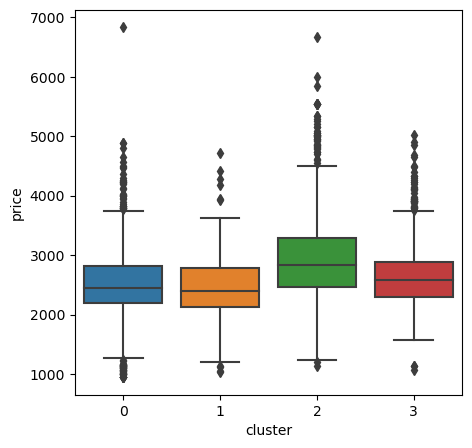

In [174]:
# dummy 변수 생성
quiz_dum = pd.get_dummies( quiz1[['cut']], drop_first=True)
quiz_dum

# price, pca table, dummy table 결합
quiz_table2 = pd.concat([ quiz1['price'], quiz_table1, quiz_dum], axis=1)
quiz_table2

# AgglomerativeClustering (n_clusters=4, affinity='euclidean', linkage='ward')
from sklearn.cluster import AgglomerativeClustering
quiz_model_cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')
quiz_model_cluster.fit(quiz_table2.drop('price', axis=1))

quiz_table2['cluster'] = quiz_model_cluster.labels_

# 평균가격이 가장 높은 cluster은 ?
quiz_table2.groupby('cluster')['price'].mean().nlargest()
print('평균가격이 가장 높은 cluster은','\n' , quiz_table2.groupby('cluster')['price'].mean().nlargest(1) )

# 시각화
fig = plt.figure( figsize=(5,5))

sns.boxplot( x='cluster', y='price', data=quiz_table2)
plt.show()

### quiz 3) 클러스터별 평균 차이가 실제 유의미한 차이가 있는지 ANOVA 분석 및 pairwise_tukeyhsd 사후 분석 수행 

In [175]:
# f_oneway ANOVA 분석
from scipy.stats import f_oneway
temp = f_oneway( quiz_table2[quiz_table2['cluster']==0]['price' ],
          quiz_table2[quiz_table2['cluster']==1]['price' ],
          quiz_table2[quiz_table2['cluster']==2]['price' ],
          quiz_table2[quiz_table2['cluster']==3]['price' ])
print(temp)

# pairwise_tukeyhsd 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc =pairwise_tukeyhsd(quiz_table2['price'], quiz_table2['cluster'], alpha = 0.05)
print(posthoc) 

# 분석결과 확인
quiz1['cluster'] = quiz_table2['cluster']
quiz1.groupby('cluster').mean()

# clarity: (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
# 유사한 carat 크기였지만 cluster=2 이 단가가 가장 높았음
# clarity Sl1 / cut Ideal / color F 각 칼럼별 비중이 높았음
pd.crosstab( quiz1['cluster'], quiz1['clarity'], normalize=1).round(3)

# cut: (Fair, Good, Very Good, Premium, Ideal)
pd.crosstab( quiz1['cluster'], quiz1['cut'], normalize=1).round(3)

# color: diamond colour, from D (best) to J (worst)
pd.crosstab( quiz1['cluster'], quiz1['color'], normalize=1).round(3)

F_onewayResult(statistic=219.00483848244653, pvalue=4.5455434486347e-135)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     0      1  -55.135 0.1997 -127.0732   16.8032  False
     0      2 393.2152    0.0   348.443  437.9873   True
     0      3 108.1832    0.0   53.8731  162.4933   True
     1      2 448.3502    0.0   378.977  517.7234   True
     1      3 163.3182    0.0   87.4388  239.1976   True
     2      3 -285.032    0.0 -335.8957 -234.1682   True
--------------------------------------------------------


color,D,E,F,G,H,I,J
cluster,,,,,,,
0,0.253,0.287,0.303,0.304,0.318,0.308,0.248
1,0.079,0.087,0.082,0.085,0.093,0.071,0.159
2,0.452,0.410,0.406,0.445,0.410,0.451,0.368
3,0.216,0.216,0.208,0.166,0.178,0.170,0.225
